<a href="https://colab.research.google.com/github/alpyts/AHV/blob/master/Kadikoy%20Housing%20Price/Kadikoy_Konut_Fiyat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set The Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib notebook
%matplotlib inline
from pandas import Series, DataFrame
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Data Import

The best way in order to get data from GitHub and work with Google Colab:


1.   Click on the .**csv** file in any repository, 
2.   Click the **Raw** Button
3.   Copy the url where in **Adress Bar**
4.   Fill the codes that below in the chunk.


```
url = 'Copied_GitHub_Data_Raw_Link'
dataset = pd.read_csv(url)

```





In [0]:
url = 'https://raw.githubusercontent.com/alpyts/AHV/master/Kadikoy%20Housing%20Price/kadikoy.csv'
houseData = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

# Data Manipulation & Descriptive Statistics

In [4]:
# first lets take a copy of dataset

df = houseData.copy()
df.head()


,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [5]:
print ('Initial shape of the Kadikoy Housing Data is :', df.shape)


Initial shape of the Kadikoy Housing Data is : (949, 14)


In [6]:
# Seen the dataTypes with observation quantity also understanding non missing value
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 14 columns):
Id               949 non-null int64
Neighborhood     949 non-null object
Date             949 non-null object
Price            949 non-null float64
NetArea          949 non-null float64
GrossArea        949 non-null float64
NumberOfRoom     949 non-null float64
AgeOfBuilding    949 non-null float64
LocatedFloor     949 non-null float64
TotalFloor       949 non-null float64
Bathroom         949 non-null float64
Balcony          949 non-null float64
Furniture        949 non-null float64
RentIncome       949 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 103.9+ KB


In [7]:
# Is there any missing value

df.isnull().values.any()

# Sum of Column and Row with Miss. Value
# df.columns[houseData.isnull().sum() != 0].size
# Column and Row with Miss. Value
# df.columns[houseData.isnull().sum() != 0]
# Miss. Value Count of Every Column 
# df.loc[:,houseData.columns[houseData.isnull().sum() != 0]].isnull().sum().sort_values()

False

In [0]:
# In order to see NAN missing values
# houseData.replace(to_replace = "", value = np.NAN,inplace=True)

Dataset including two categorical feature

1. Neighborhood also should be convert to ordinal variable.
2. Published Date

In [9]:
# Repeated Observation Control

df[df.duplicated(keep=False)]

,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome


In [10]:
# The name of Columns

df.columns

Index(['Id', 'Neighborhood', 'Date', 'Price', 'NetArea', 'GrossArea',
       'NumberOfRoom', 'AgeOfBuilding', 'LocatedFloor', 'TotalFloor',
       'Bathroom', 'Balcony', 'Furniture', 'RentIncome'],
      dtype='object')

In [0]:
# Edit Blank Spaces in Column names
df.columns = df.columns.str.replace(' ',"")

In [0]:
# After dublicated observation control lets delete the irrelevant columns

# Delete the "Date" column from the dataframe

df = df.drop("Date", axis=1)

# Delete the "Id" column from the dataframe because It is related with uniq of every ad. 

df = df.drop("Id", axis=1)


In [13]:
df.columns

Index(['Neighborhood', 'Price', 'NetArea', 'GrossArea', 'NumberOfRoom',
       'AgeOfBuilding', 'LocatedFloor', 'TotalFloor', 'Bathroom', 'Balcony',
       'Furniture', 'RentIncome'],
      dtype='object')

In [14]:
# 5 Number Summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,949.0,741.866175,320.085283,167.0,545.0,695.0,865.0,4150.0
NetArea,949.0,82.671233,14.765374,39.0,75.0,85.0,93.0,125.0
GrossArea,949.0,103.246575,18.322771,40.0,90.0,105.0,120.0,130.0
NumberOfRoom,949.0,3.331928,0.602774,1.0,3.0,3.0,4.0,5.0
AgeOfBuilding,949.0,7.701791,11.880497,0.0,0.0,0.0,13.0,30.0
LocatedFloor,949.0,4.403583,3.516451,-1.0,1.0,3.0,8.0,14.0
TotalFloor,949.0,8.113804,3.379903,1.0,5.0,8.0,10.0,23.0
Bathroom,949.0,1.396207,0.497914,0.0,1.0,1.0,2.0,3.0
Balcony,949.0,0.575342,0.494552,0.0,0.0,1.0,1.0,1.0
Furniture,949.0,0.031612,0.175058,0.0,0.0,0.0,0.0,1.0


In [15]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Neighborhood,949,7,Goztepe,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,949,NaN,NaN,NaN,741.866,320.085,167,545,695,865,4150
NetArea,949,NaN,NaN,NaN,82.6712,14.7654,39,75,85,93,125
GrossArea,949,NaN,NaN,NaN,103.247,18.3228,40,90,105,120,130
NumberOfRoom,949,NaN,NaN,NaN,3.33193,0.602774,1,3,3,4,5
AgeOfBuilding,949,NaN,NaN,NaN,7.70179,11.8805,0,0,0,13,30
LocatedFloor,949,NaN,NaN,NaN,4.40358,3.51645,-1,1,3,8,14
TotalFloor,949,NaN,NaN,NaN,8.1138,3.3799,1,5,8,10,23
Bathroom,949,NaN,NaN,NaN,1.39621,0.497914,0,1,1,2,3
Balcony,949,NaN,NaN,NaN,0.575342,0.494552,0,0,1,1,1


In [16]:
df.nunique()

Neighborhood       7
Price            213
NetArea           62
GrossArea         57
NumberOfRoom       5
AgeOfBuilding     11
LocatedFloor      16
TotalFloor        17
Bathroom           4
Balcony            2
Furniture          2
RentIncome         2
dtype: int64

In [0]:
df.Neighborhood = pd.Categorical(df.Neighborhood)
df.dtypes
kat_df = df.select_dtypes(include = ['category'])

In [18]:
kat_df.head(3)

,Neighborhood
0,Egitim
1,Hasanpasa
2,Hasanpasa


In [19]:
kat_df.tail(3)

,Neighborhood
946,Fenerbahce
947,Goztepe
948,Fenerbahce


In [20]:
kat_df.Neighborhood.unique()

[Egitim, Hasanpasa, Feneryolu, Goztepe, Fenerbahce, Kadikoy, Zuhtupasa]
Categories (7, object): [Egitim, Hasanpasa, Feneryolu, Goztepe, Fenerbahce, Kadikoy, Zuhtupasa]

In [21]:
kat_df['Neighborhood'].value_counts().count()

7

In [22]:
kat_df['Neighborhood'].value_counts()

Goztepe        431
Feneryolu      188
Hasanpasa       96
Fenerbahce      95
Zuhtupasa       79
Egitim          54
Kadikoy          6
Name: Neighborhood, dtype: int64

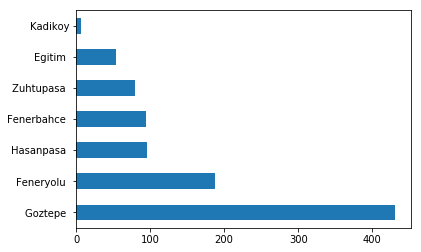

In [23]:
df['Neighborhood'].value_counts().plot.barh();

In [0]:
from pandas.api.types import CategoricalDtype 

In [25]:
# convert nominal cat. -> ordinal cat 

kat_df = kat_df.astype(CategoricalDtype(ordered = True))
kat_df.Neighborhood.head(3)

0       Egitim 
1    Hasanpasa 
2    Hasanpasa 
Name: Neighborhood, dtype: category
Categories (7, object): [Egitim < Fenerbahce < Feneryolu < Goztepe < Hasanpasa < Kadikoy < Zuhtupasa]

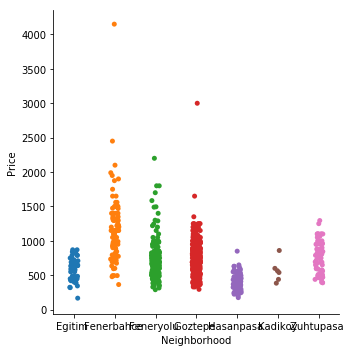

In [26]:
sns.catplot(x = "Neighborhood", y = 'Price' , data = df);

In [0]:
# Considering Prices The Scala will be

Neighborhood_Categories = ['Hasanpasa','Egitim','Kadikoy','Zuhtupasa','Goztepe', 'Feneryolu', 'Fenerbahce']

In [0]:
kat_df = kat_df.astype(CategoricalDtype(categories = Neighborhood_Categories ,ordered = True))

In [29]:
kat_df.Neighborhood.head(3)

0    NaN
1    NaN
2    NaN
Name: Neighborhood, dtype: category
Categories (7, object): [Hasanpasa < Egitim < Kadikoy < Zuhtupasa < Goztepe < Feneryolu < Fenerbahce]

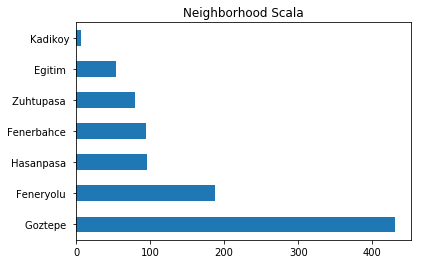

In [30]:
(df['Neighborhood']
 .value_counts()
 .plot.barh()
 .set_title('Neighborhood Scala'));



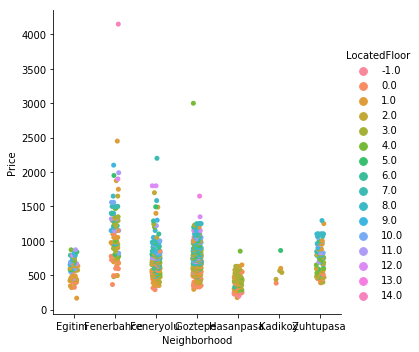

In [31]:
sns.catplot(x = "Neighborhood", y = 'Price' , hue = "LocatedFloor", data = df);

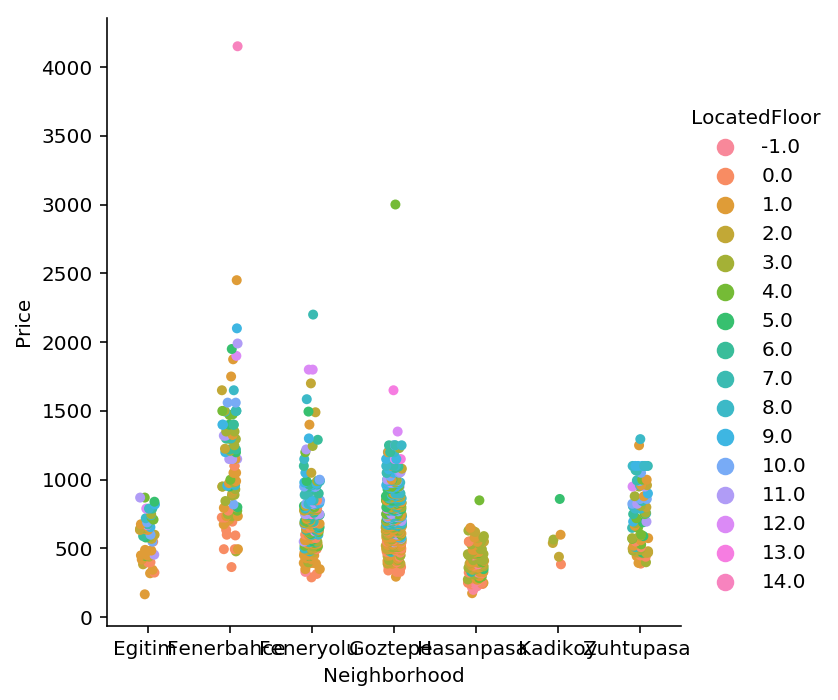

In [32]:
# get higly resolation

%config InlineBackend.figure_format = 'retina'
sns.catplot(x = "Neighborhood", y = 'Price' , hue = "LocatedFloor", data = df);

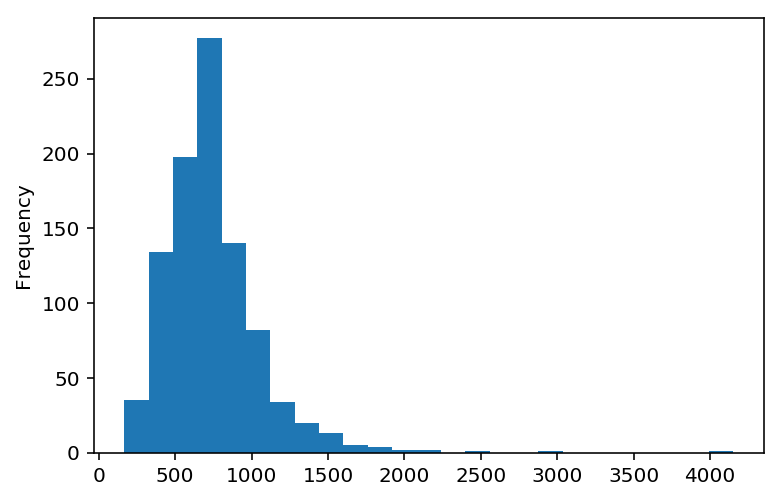

In [33]:
# Price Barplot

(df['Price']
.plot
.hist(bins=25));

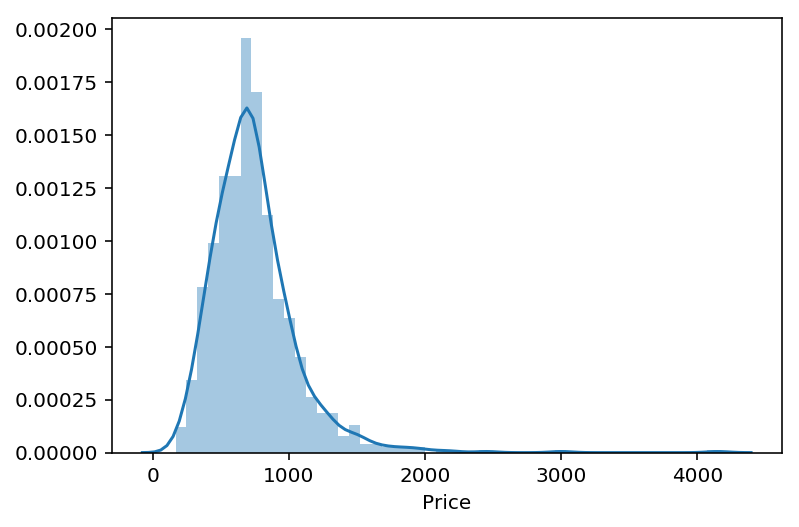

In [34]:
# Distributions
sns.distplot(df.Price);

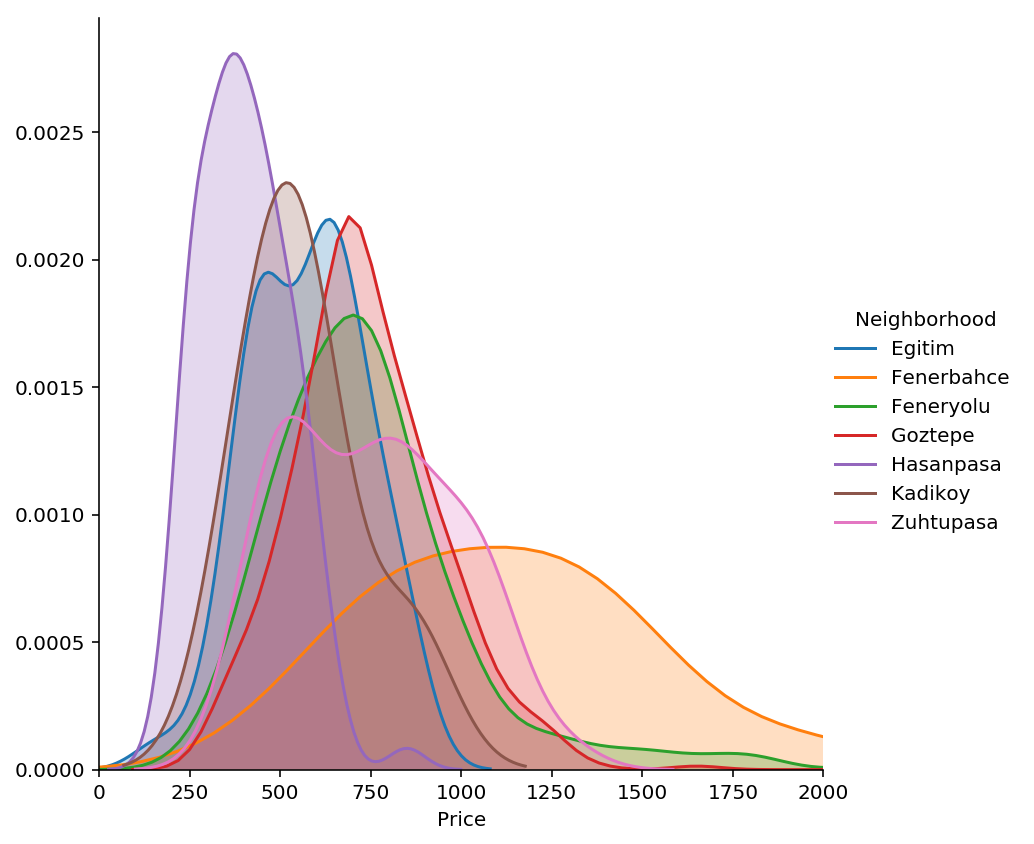

In [35]:
# Price range ordered to Neighborhood

(sns
    .FacetGrid(df,
             hue = 'Neighborhood',
             height = 6,
             xlim = (0,2000))
    .map(sns.kdeplot, 'Price', shade = True)
    .add_legend()
    );

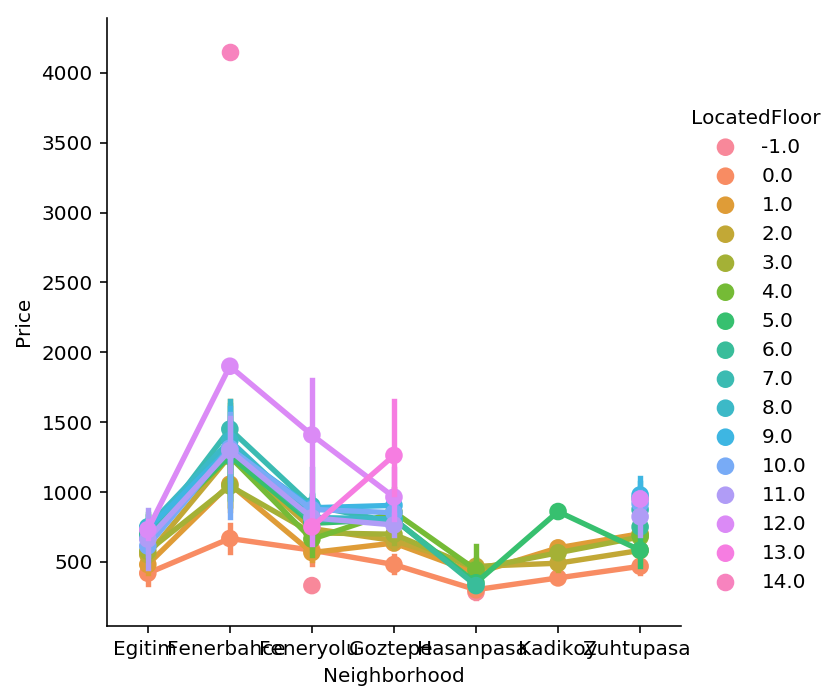

In [36]:
sns.catplot(x = 'Neighborhood', y = 'Price', hue = 'LocatedFloor', kind = 'point', data = df);

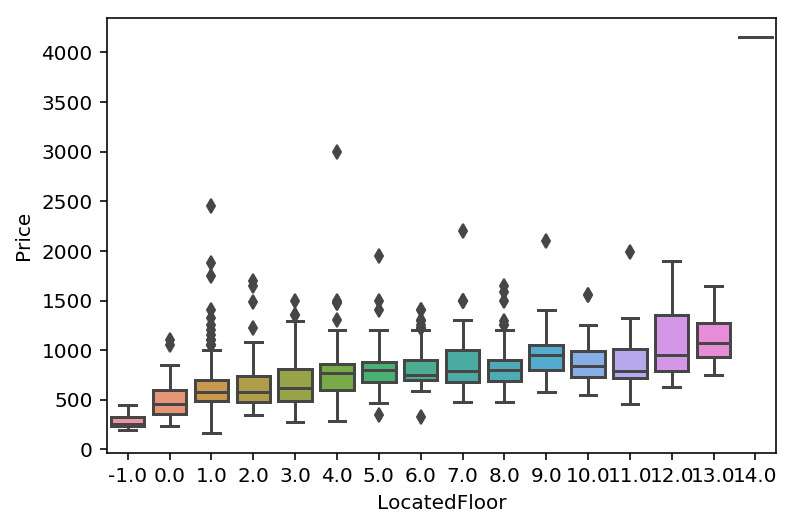

In [38]:
sns.boxplot(x = 'LocatedFloor', y= 'Price', data = df);

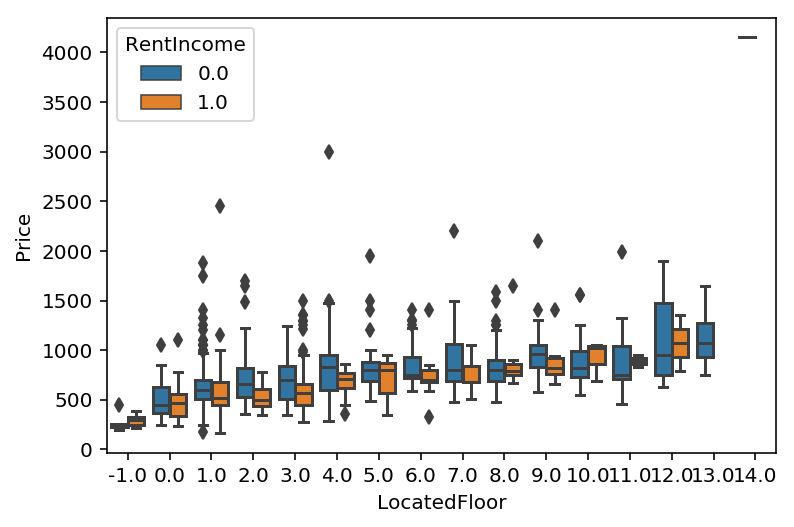

In [39]:
sns.boxplot(x = 'LocatedFloor', y= 'Price', hue = 'RentIncome', data = df);

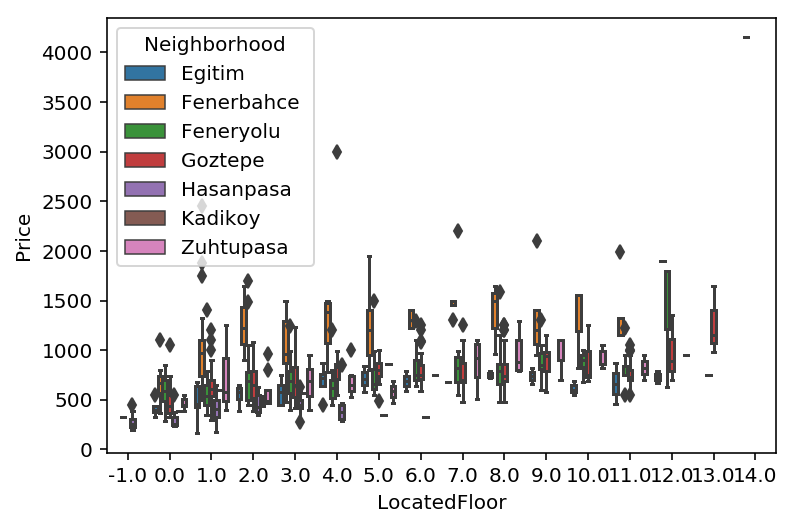

In [40]:
sns.boxplot(x = 'LocatedFloor', y= 'Price', hue = 'Neighborhood', data = df);

# Correlation

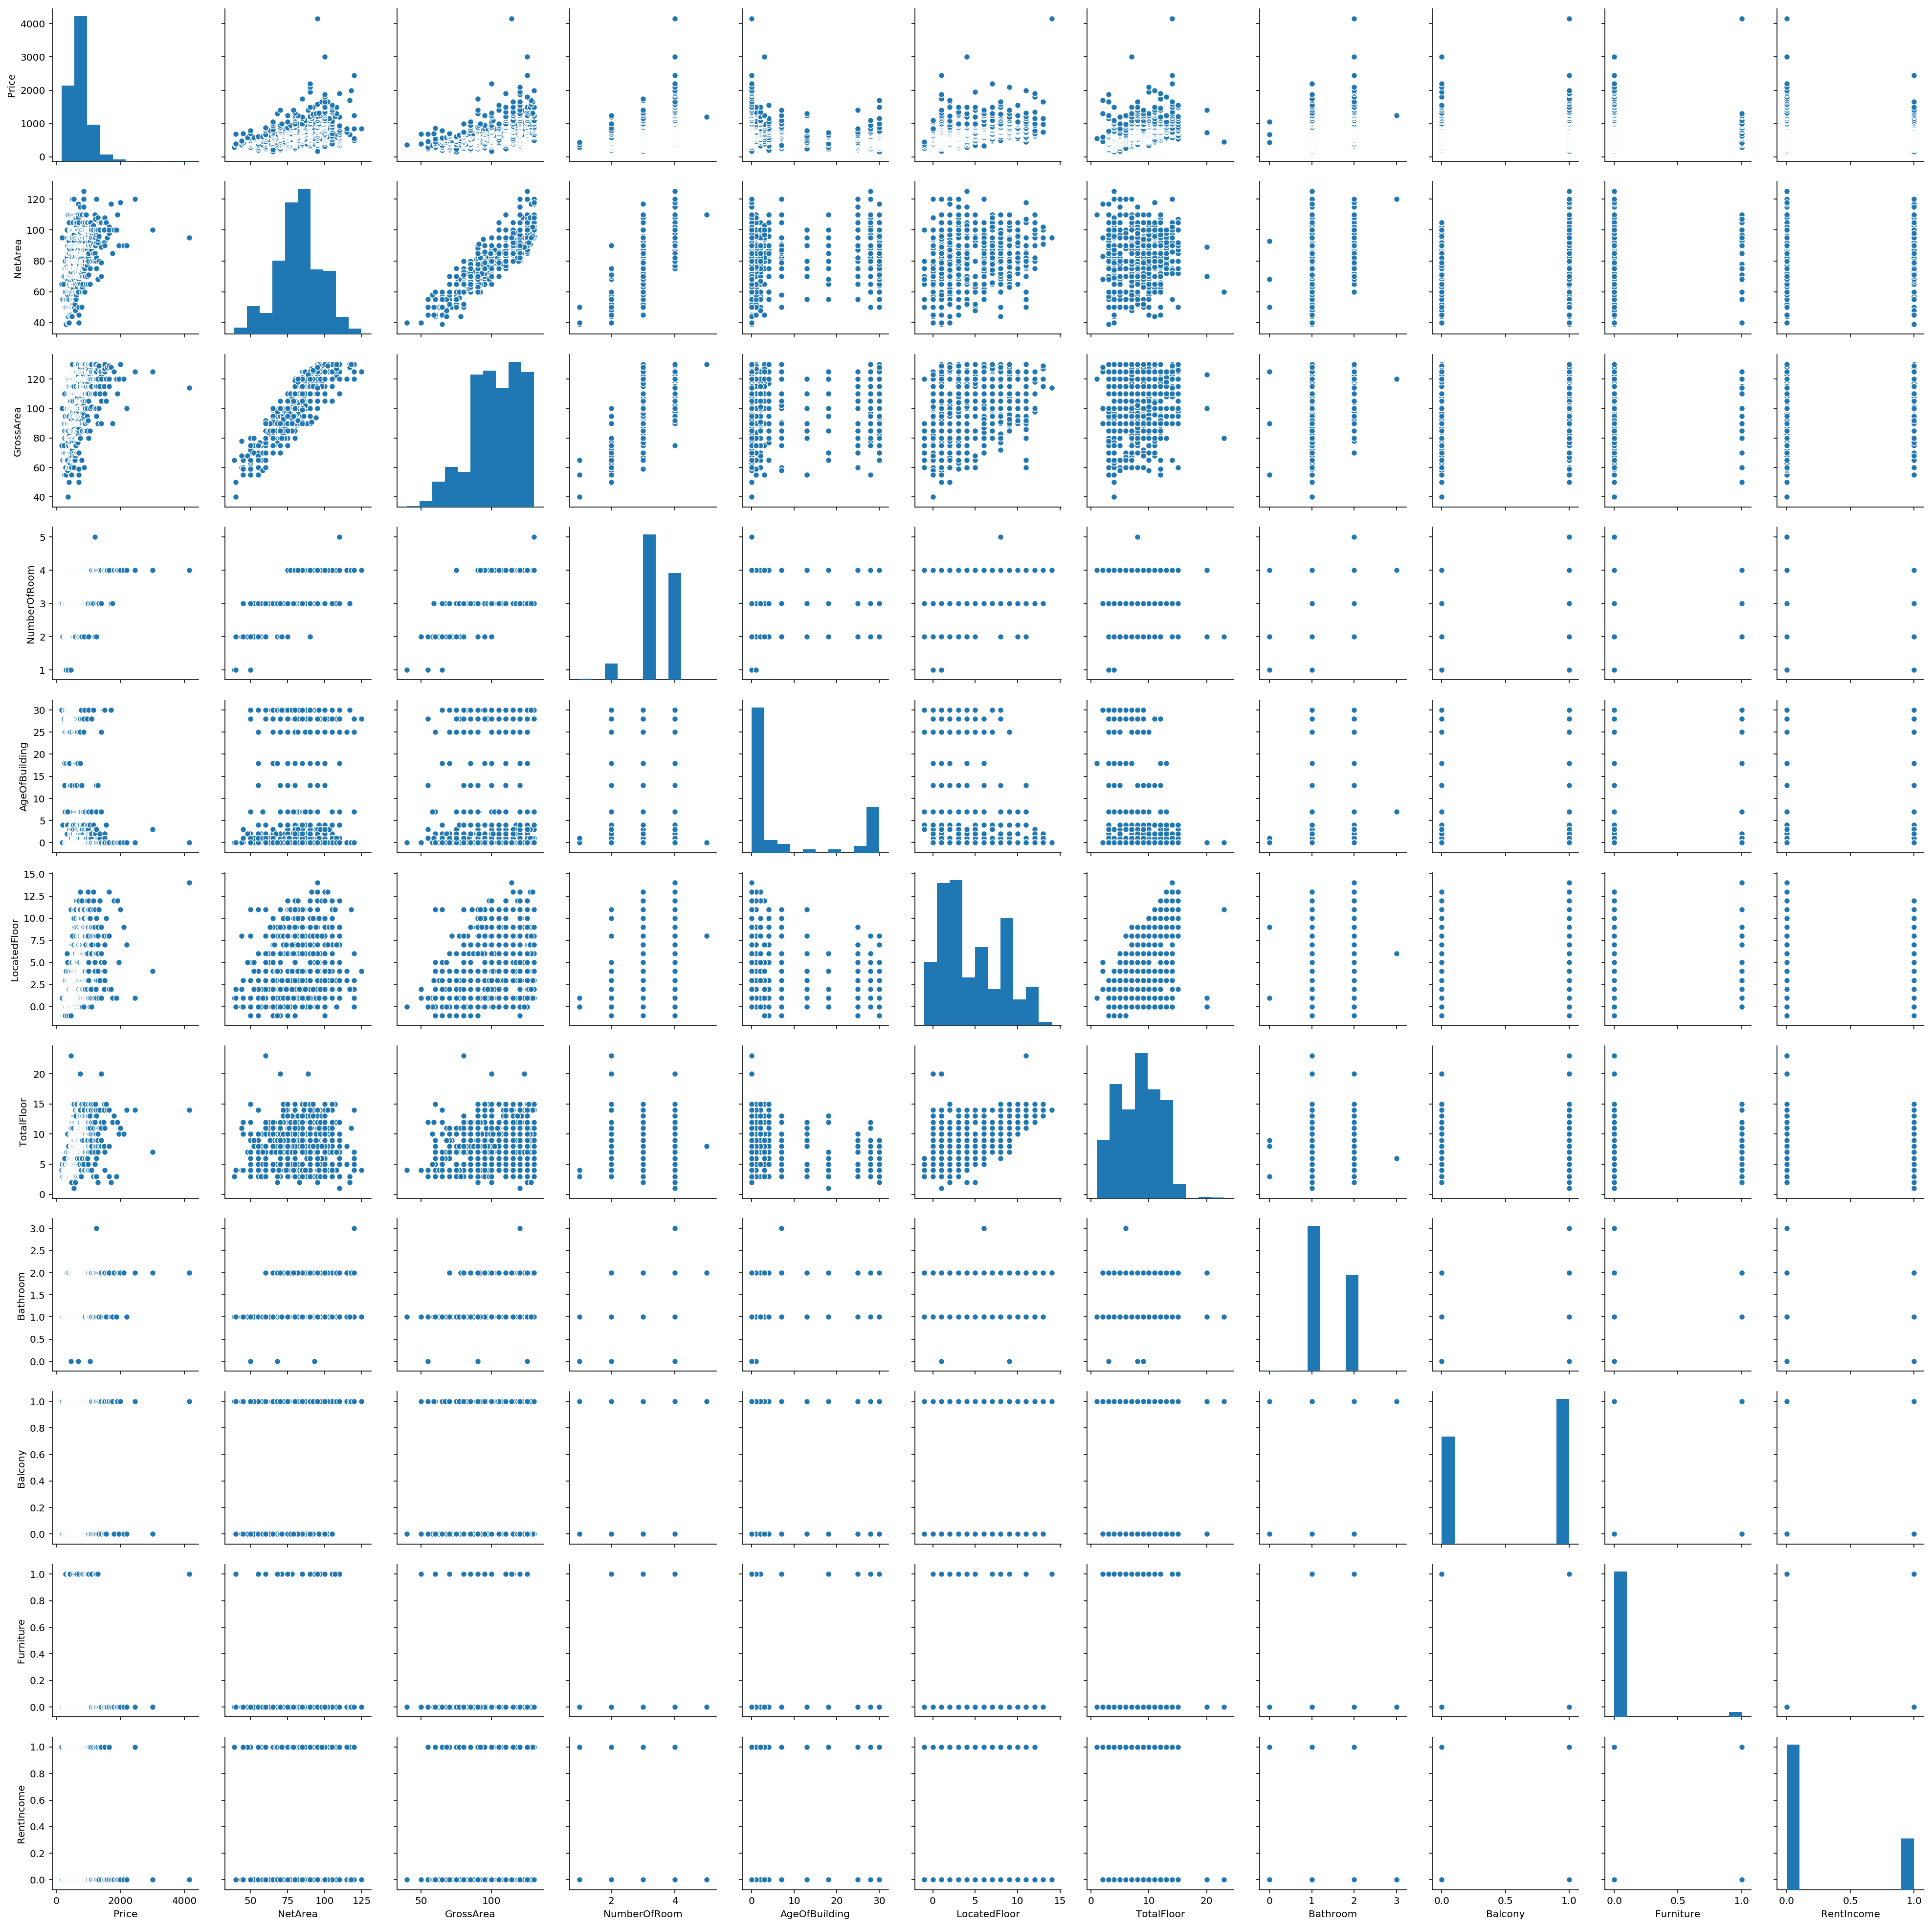

In [41]:
sns.pairplot(df);

In [0]:
#sns.pairplot(df, hue = "RentIncome", markers = ['o', 's']);

# 0, 1, 2, 3, 4, u'D', 6, 7, 8, u's', u'|', 11, u'None', u'P', 9, u'x', u'X', 5, u'_', u'^', u' ', None, u'd', u'h', u'+', u'*', u',', u'o', u'.', u'1', u'p', u'3', u'2', u'4', u'H', u'v', u'', u'8', 10, u'&lt;', u'&gt;'

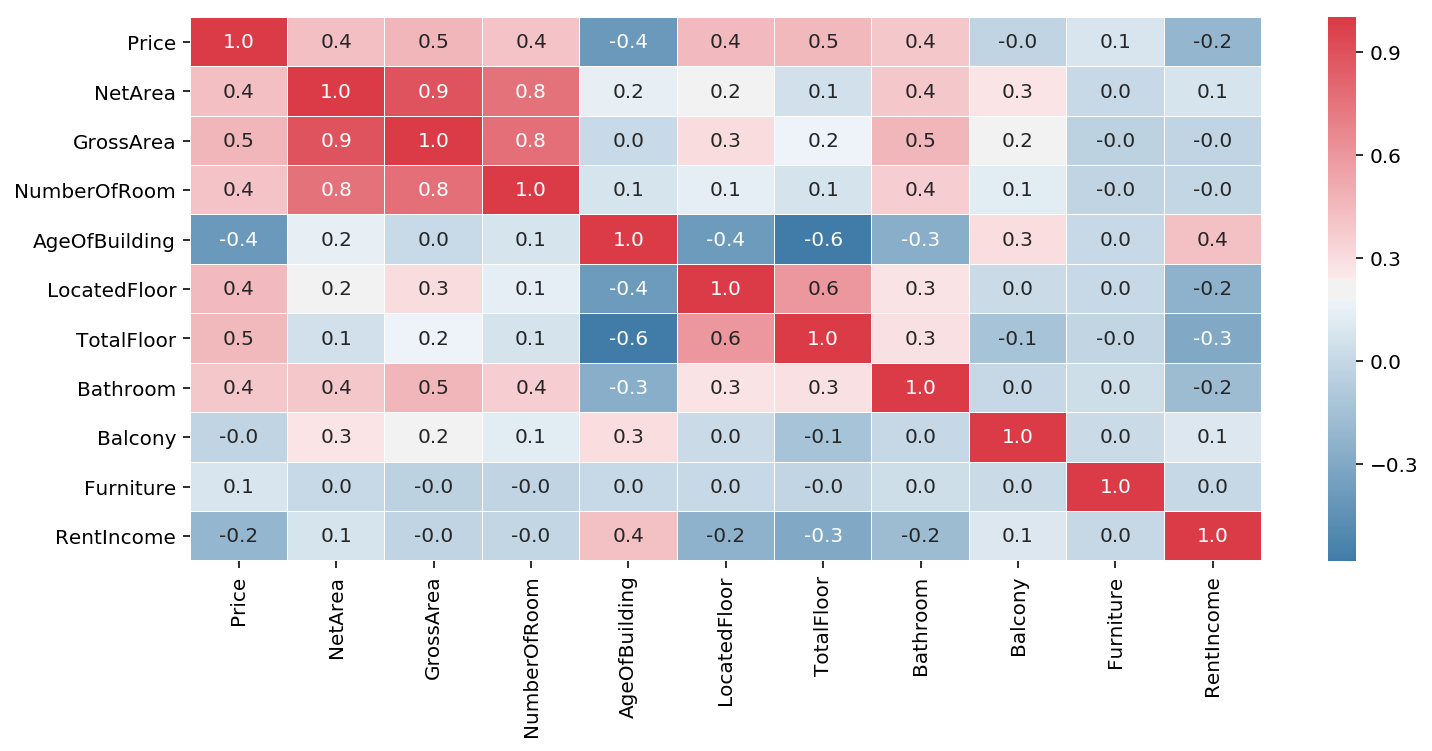

In [82]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
colormap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=.01, fmt='.1f', ax=ax);

In [0]:
# Display the correlation heatmap

# Correlation

#fig = plt.figure(figsize=(30,30))
#ax = fig.add_subplot(1,1,1)
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(houseData.corr(), cmap=colormap, annot=True, linewidths=.4, fmt='.1f', ax=ax)


## Sorted the most important features correlated to Sale Price


#corr = houseData.corr()
#corr.sort_values(["Price"], ascending = False, inplace = True)
#print("Most important feature correlated to Sale Price")
#print(corr.Price)


## Show the correlation summary
#houseData.corr()

## Get information from column 'SalePrice'

## We will see that the SalePrice minimum value is greater than zero.

#houseData['Price'].describe()


## Looking for outliers


#plt.scatter(x = houseData.NetArea, y = houseData.Price, c = "blue", marker = "s")
#plt.title("Scatter Plot of NetArea and SalePrice Initial")
#plt.xlabel("NetArea")
#plt.ylabel("SalePrice")
#plt.show()


## Remove these outliers to make a good prediction later on
#houseData = houseData.drop(houseData[(houseData['NetArea']>100)].index)
#houseData = houseData.drop(houseData[(houseData['Price']>2000)].index)


## Display the graph after three outliers have been removed


#plt.scatter(x = houseData.NetArea, y = houseData.Price, c = "blue", marker = "s")
#plt.title("Scatter Plot of NetArea and SalePrice Initial")
#plt.xlabel("NetArea")
#plt.ylabel("SalePrice")
#plt.show()


## Plot 'SalePrice' and 'AgeOfBuilding' 


#plt.scatter(x = houseData.AgeOfBuilding, y = houseData.Price, c = "blue", marker = "s")
#plt.title("Scatter Plot of SalePrice and AgeOfBuilding")
#plt.xlabel("AgeOfBuilding")
#plt.ylabel("Price")
#plt.show()


## Plot 'SalePrice' and 'Balcony'


#plt.scatter(x = houseData.Balcony, y = houseData.Price, c = "blue", marker = "s")
#plt.title("Scatter Plot of SalePrice and 'Balcony' (Evaluates the quality of the material on the exterior)")
#plt.xlabel("Balcony")
#plt.ylabel("Price")
#plt.show()


## Plot 'SalePrice' and 'Rentable'
#plt.scatter(x = houseData.RentIncome, y = houseData.Price, c = "blue", marker = "s")
#plt.title("Scatter Plot of SalePrice and 'RentIncome' (Evaluates the quality of the material on the exterior)")
#plt.xlabel("RentIncome")
#plt.ylabel("Price")
#plt.show()


## Plot 'SalePrice' and 'NumberOfRoom'
#plt.scatter(x = houseData.NumberOfRoom, y = houseData.Price, c = "blue", marker = "s")
#plt.title("Scatter Plot of SalePrice and 'NumberOfRoom' (Evaluates the quality of the material on the exterior)")
#plt.xlabel("NumberOfRoom")
#plt.ylabel("Price")
#plt.show()


## Check the distribution of label values (SalePrice)
#sns.distplot(houseData['Price'])



## Skewness metric
#houseData['Price'].skew()



##The skewness value > 1 ==> data is highly skewed. We can use Logarithm transformation to normalize the SalePrice data. A normalized label helps in better modeling the relationship between label values and independent features.

#normalized_saleprice = np.log(houseData['Price'])
#print('Check skewness:', normalized_saleprice.skew())
#sns.distplot(normalized_saleprice)